In [1]:
!pip install --user opencv-python
!pip install --user scipy
!pip install --user ffmpeg-python
!pip install --user matplotlib
!pip install --user numpy

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [2]:
!pip install --user moviepy

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
  Using cached numpy-1.19.5-cp36-cp36m-manylinux2010_x86_64.whl (14.8 MB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
from scipy import signal
import csv
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [4]:
# read in data
with open('output_data/simulation_14/layer_0_full_spikes.csv', newline='') as csv_file:
    l0_spike_times = list(csv.reader(csv_file))
with open('output_data/simulation_14/layer_1_excitatory_full_spikes.csv', newline='') as csv_file:
    l1_exc_spike_times = list(csv.reader(csv_file))
with open('output_data/simulation_14/layer_1_inhibitory_full_spikes.csv', newline='') as csv_file:
    l1_inh_spike_times = list(csv.reader(csv_file))
with open('output_data/simulation_14/layer_2_excitatory_full_spikes.csv', newline='') as csv_file:
    l2_exc_spike_times = list(csv.reader(csv_file))
with open('output_data/simulation_14/layer_2_inhibitory_full_spikes.csv', newline='') as csv_file:
    l2_inh_spike_times = list(csv.reader(csv_file))
with open('output_data/simulation_14/layer_3_excitatory_full_spikes.csv', newline='') as csv_file:
    l3_exc_spike_times = list(csv.reader(csv_file))
with open('output_data/simulation_14/layer_3_inhibitory_full_spikes.csv', newline='') as csv_file:
    l3_inh_spike_times = list(csv.reader(csv_file))
with open('output_data/simulation_14/layer_4_excitatory_full_spikes.csv', newline='') as csv_file:
    l4_exc_spike_times= list(csv.reader(csv_file))
with open('output_data/simulation_14/layer_4_inhibitory_full_spikes.csv', newline='') as csv_file:
    l4_inh_spike_times = list(csv.reader(csv_file))

In [5]:
# parameters
f_samp  = 100  # sampling frequency
T = 32           # length of spike data in seconds
N_neurons_exc = 4096 # number of neurons
N_neurons_inh = 1024
N_neurons_poisson = 65536

 # empty arrays to store binary series
l1_exc_spikes = np.zeros([N_neurons_exc,T*f_samp]).astype(int)
l2_exc_spikes = np.zeros([N_neurons_exc,T*f_samp]).astype(int)
l3_exc_spikes = np.zeros([N_neurons_exc,T*f_samp]).astype(int)
l4_exc_spikes = np.zeros([N_neurons_exc,T*f_samp]).astype(int)
l1_inh_spikes = np.zeros([N_neurons_inh,T*f_samp]).astype(int)
l2_inh_spikes = np.zeros([N_neurons_inh,T*f_samp]).astype(int)
l3_inh_spikes = np.zeros([N_neurons_inh,T*f_samp]).astype(int)
l4_inh_spikes = np.zeros([N_neurons_inh,T*f_samp]).astype(int)

poisson_spikes = []
for i in range(10):
    poisson_single = np.zeros([N_neurons_poisson,T*f_samp]).astype(int)
    poisson_spikes.append(poisson_single)
    
# turn spike data into binary series

# LIF neurons
count = 0
for time in l1_exc_spike_times[1][:]:
    time_idx = int(float(time)*f_samp)
    neuron = int(l1_exc_spike_times[0][count])
    # print('time: {}'.format(time_idx))
    # print('neuron: {}'.format(neuron))
    l1_exc_spikes[neuron,time_idx] = 255
    count+=1
count = 0
for time in l1_inh_spike_times[1][:]:
    time_idx = int(float(time)*f_samp)
    neuron = int(l1_inh_spike_times[0][count])
    # print('time: {}'.format(time_idx))
    # print('neuron: {}'.format(neuron))
    l1_inh_spikes[neuron,time_idx] = 255
    count+=1
count = 0
for time in l2_exc_spike_times[1][:]:
    time_idx = int(float(time)*f_samp)
    neuron = int(l2_exc_spike_times[0][count])
    # print('time: {}'.format(time_idx))
    # print('neuron: {}'.format(neuron))
    l2_exc_spikes[neuron,time_idx] = 255
    count+=1
count = 0
for time in l2_inh_spike_times[1][:]:
    time_idx = int(float(time)*f_samp)
    neuron = int(l2_inh_spike_times[0][count])
    # print('time: {}'.format(time_idx))
    # print('neuron: {}'.format(neuron))
    l2_inh_spikes[neuron,time_idx] = 255
    count+=1
count = 0
for time in l3_exc_spike_times[1][:]:
    time_idx = int(float(time)*f_samp)
    neuron = int(l3_exc_spike_times[0][count])
    # print('time: {}'.format(time_idx))
    # print('neuron: {}'.format(neuron))
    l3_exc_spikes[neuron,time_idx] = 255
    count+=1
count = 0
for time in l3_inh_spike_times[1][:]:
    time_idx = int(float(time)*f_samp)
    neuron = int(l3_inh_spike_times[0][count])
    # print('time: {}'.format(time_idx))
    # print('neuron: {}'.format(neuron))
    l3_inh_spikes[neuron,time_idx] = 255
    count+=1
count = 0
for time in l4_exc_spike_times[1][:]:
    time_idx = int(float(time)*f_samp)
    neuron = int(l4_exc_spike_times[0][count])
    # print('time: {}'.format(time_idx))
    # print('neuron: {}'.format(neuron))
    l4_exc_spikes[neuron,time_idx] = 255
    count+=1
count = 0
for time in l4_inh_spike_times[1][:]:
    time_idx = int(float(time)*f_samp)
    neuron = int(l4_inh_spike_times[0][count])
    # print('time: {}'.format(time_idx))
    # print('neuron: {}'.format(neuron))
    l4_inh_spikes[neuron,time_idx] = 255
    count+=1
    
# Poisson neurons 
count = 0
for time in l0_spike_times[1][:]:
    time_idx = int(float(time)*f_samp)
    neuron = int(l4_inh_spike_times[0][count])
    # print('time: {}'.format(time_idx))
    # print('neuron: {}'.format(neuron))
    for i in range(10):
        if i*N_neurons_poisson < neuron <= (i+1)*N_neurons_poisson:
            poisson_spikes[i][neuron,time_idx] = 255
    count+=1


In [6]:
# create images of spikes according to spatial location through time

l1_exc_frames = np.empty([64,64,f_samp*T]).astype(int)
l2_exc_frames = np.empty([64,64,f_samp*T]).astype(int)
l3_exc_frames = np.empty([64,64,f_samp*T]).astype(int)
l4_exc_frames = np.empty([64,64,f_samp*T]).astype(int)
l1_inh_frames = np.empty([32,32,f_samp*T]).astype(int)
l2_inh_frames = np.empty([32,32,f_samp*T]).astype(int)
l3_inh_frames = np.empty([32,32,f_samp*T]).astype(int)
l4_inh_frames = np.empty([32,32,f_samp*T]).astype(int)

poisson_frames = []
for i in range(10):
    poisson_single_frames = np.empty([256,256,f_samp*T]).astype(int)
    poisson_frames.append(poisson_single_frames)
    
for n in range(f_samp*T):
    count = 0
    for x in range(64):
        for y in range(64):
            l1_exc_frames[x,y,n] = l1_exc_spikes[count,n]
            l2_exc_frames[x,y,n] = l2_exc_spikes[count,n]
            l3_exc_frames[x,y,n] = l3_exc_spikes[count,n]
            l4_exc_frames[x,y,n] = l4_exc_spikes[count,n]
            count += 1
    count = 0
    for x in range(32):
        for y in range(32):
            l1_inh_frames[x,y,n] = l1_inh_spikes[count,n]
            l2_inh_frames[x,y,n] = l2_inh_spikes[count,n]
            l3_inh_frames[x,y,n] = l3_inh_spikes[count,n]
            l4_inh_frames[x,y,n] = l4_inh_spikes[count,n]
            count += 1
    count = 0
    for i in range(10):
        for x in range(256):
            for y in range(256):
                poisson_frames[i][x,y,n] = poisson_spikes[i][count,n]

In [7]:
# moving average
l1_exc_activity = np.empty([64,64,f_samp*T]).astype(int)
l2_exc_activity = np.empty([64,64,f_samp*T]).astype(int)
l3_exc_activity = np.empty([64,64,f_samp*T]).astype(int)
l4_exc_activity = np.empty([64,64,f_samp*T]).astype(int)
l1_inh_activity = np.empty([32,32,f_samp*T]).astype(int)
l2_inh_activity = np.empty([32,32,f_samp*T]).astype(int)
l3_inh_activity = np.empty([32,32,f_samp*T]).astype(int)
l4_inh_activity = np.empty([32,32,f_samp*T]).astype(int)

poisson_activity = []
for i in range(10):
    poisson_single_frames = np.empty([256,256,f_samp*T]).astype(int)
    poisson_activity.append(poisson_single_frames)

ma = np.ones([10])/10 # convolution kernel for MA filter
for x in range(64):
    for y in range(64):
        l1_exc_activity[x,y,:] = signal.convolve(l1_exc_frames[x,y,:],ma,mode='same')
        l2_exc_activity[x,y,:] = signal.convolve(l2_exc_frames[x,y,:],ma,mode='same')
        l3_exc_activity[x,y,:] = signal.convolve(l3_exc_frames[x,y,:],ma,mode='same')
        l4_exc_activity[x,y,:] = signal.convolve(l4_exc_frames[x,y,:],ma,mode='same')
for x in range(32):
    for y in range(32):
        l1_inh_activity[x,y,:] = signal.convolve(l1_inh_frames[x,y,:],ma,mode='same')
        l2_inh_activity[x,y,:] = signal.convolve(l2_inh_frames[x,y,:],ma,mode='same')
        l3_inh_activity[x,y,:] = signal.convolve(l3_inh_frames[x,y,:],ma,mode='same')
        l4_inh_activity[x,y,:] = signal.convolve(l4_inh_frames[x,y,:],ma,mode='same')
for i in range(10):
    for x in range(256):
        for y in range(256):
            poisson_activity[i][x,y,:] = signal.convolve(poisson_frames[i][x,y,:],ma,mode='same')

In [8]:
%matplotlib inline

MovieWriter ffmpeg unavailable. Trying to use pillow instead.


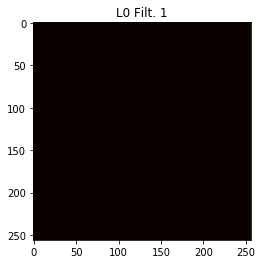

MovieWriter ffmpeg unavailable. Trying to use pillow instead.


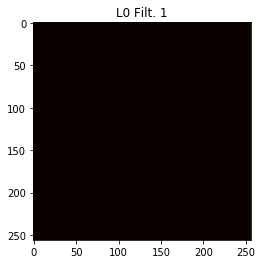

MovieWriter ffmpeg unavailable. Trying to use pillow instead.


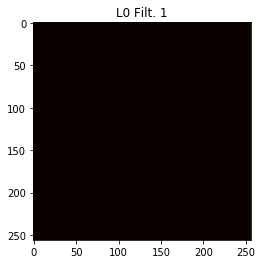

MovieWriter ffmpeg unavailable. Trying to use pillow instead.


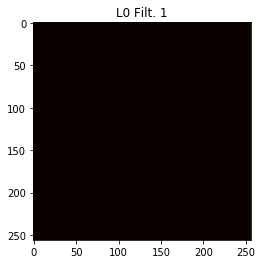

MovieWriter ffmpeg unavailable. Trying to use pillow instead.


In [ ]:
# create files of spikes through time

fps = f_samp/20        # frames per second (fps = f_samp for real time)
N_frames = f_samp*T # number of frames
width_exc = 64          # video width in pixels
width_inh = 32


#%% create files of activity of LIF neurons through time

import matplotlib.cm as cm
import matplotlib.animation as animation

frames = [] # for storing the generated images
for i in range(10):
    fig = plt.figure()
    for j in range(3200):
        frames.append([plt.imshow(poisson_activity[i][:,:,j], cmap=cm.hot, animated=True)])
    # plt.colorbar()
    ani = animation.ArtistAnimation(fig, frames, interval=(1/(1000*fps)), blit=True,
                                    repeat_delay=1000)
    plt.title('L0 Filt. {}'.format(i+1))
    ani.save('L0_filt_{}.gif'.format(i+1))
    plt.show()

# fig = plt.figure()

# def animate(i): 
#     z = poisson_activity[0][:,:,i]
#     cont = plt.imshow(z)
#     plt.title('L0 Filt. 1')
#     return cont  

# nFrames=3200
# anim = animation.FuncAnimation(fig, animate, frames=nFrames)
# anim.save('L0_filt_1.gif')
# plt.show()

In [ ]:
import numpy as np
frames = poisson_activity[0]

# save it as a gif
from moviepy.editor import ImageSequenceClip
clip = ImageSequenceClip(list(frames), fps=fps)
clip.write_gif('test.gif', fps=fps)

In [ ]:
from IPython.display import display, Image
Image('L2_inh.gif')